This tutorial is based on **Python for Data Analysis Part 16: Preparing Numeric Data**:
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16.html

In [1]:
%matplotlib inline
import numpy as np              
import pandas as pd



**Highly Correlated Values**

In predictive modeling, each variable you use to construct a model would ideally represent some unique feature of the data. In other words, you want each variable to tell you something different. In reality, variables often exhibit collinearity - a strong correlation or tendency to move together, typically due to some underlying similarity or common influencing factor. Variables with strong correlations can interfere with one another when performing modeling and muddy results.
You can check the pairwise correlations between numeric variables using the df.corr() function:

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [3]:
df.index = df.id       # Set row index to patient ID name
df_num = df[['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 
             'height', 'weight', 'bp.1s', 'bp.1d', 'waist', 'hip']]
df_num.head()


,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
id,,,,,,,,,,,,
1000,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,29.0,38.0
1001,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,46.0,48.0
1002,228.0,92,37.0,6.2,4.64,58,61.0,256.0,190.0,92.0,49.0,57.0
1003,78.0,93,12.0,6.5,4.63,67,67.0,119.0,110.0,50.0,33.0,38.0
1005,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,44.0,41.0


In [4]:
# Now we'll commit a horrible sin and drop all the rows with missing values 
# without bothering to check why those values are missing.
# Remember that in real-life scenarios you should NEVER do this

df_num = df_num.dropna()

** Understanding Correlations **

* A positive correlation implies that when one variable goes up the other tends to go up as well. 
* Negative correlations indicate an inverse relationship: when one variable goes up the other tends to go down. 
* A correlation near zero indicates low correlation 
* A correlation near -1 or 1 indicates a large negative or positive correlation.

In [5]:
# Check the pairwise correlations of all variables
df_num.corr()   

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
chol,1.000000,0.174624,0.187278,0.477736,0.270907,0.254901,-0.069865,0.056391,0.206428,0.173598,0.119513,0.072633
stab.glu,0.174624,1.000000,-0.158262,0.292521,0.742818,0.288539,0.085565,0.178488,0.162689,0.027106,0.227030,0.133964
hdl,0.187278,-0.158262,1.000000,-0.683980,-0.151109,0.027971,-0.092034,-0.298813,0.034460,0.075550,-0.285098,-0.233133
ratio,0.477736,0.292521,-0.683980,1.000000,0.347835,0.165961,0.081420,0.278872,0.110000,0.040261,0.308856,0.202668
glyhb,0.270907,0.742818,-0.151109,0.347835,1.000000,0.334877,0.052439,0.159161,0.201051,0.046258,0.240635,0.141772
age,0.254901,0.288539,0.027971,0.165961,0.334877,1.000000,-0.097725,-0.067222,0.452697,0.063394,0.150054,-0.001946
height,-0.069865,0.085565,-0.092034,0.081420,0.052439,-0.097725,1.000000,0.247860,-0.048088,0.040233,0.045463,-0.117334
weight,0.056391,0.178488,-0.298813,0.278872,0.159161,-0.067222,0.247860,1.000000,0.087084,0.172883,0.851316,0.828334
bp.1s,0.206428,0.162689,0.034460,0.110000,0.201051,0.452697,-0.048088,0.087084,1.000000,0.607783,0.203159,0.144967
bp.1d,0.173598,0.027106,0.075550,0.040261,0.046258,0.063394,0.040233,0.172883,0.607783,1.000000,0.170561,0.153947


** Inspect the results! **

Inspecting the data table, we see that the weight and waste have fairly strong positive correlations to each other. This indicates that heavier patients have larger waist sizes.

A scatter plot matrix can be a helpful visual aide for inspecting correlations and collinearity. We can create one with the pandas scatter_matrix() 

A scatter plot matrix creates pairwise scatter plots that let you visually inspect the relationships between pairs of variables. It can also help identify oddities in the data, such as variables like cyl that only take on values in a small discrete set.

In [6]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114376a50>,
      dtype=object)

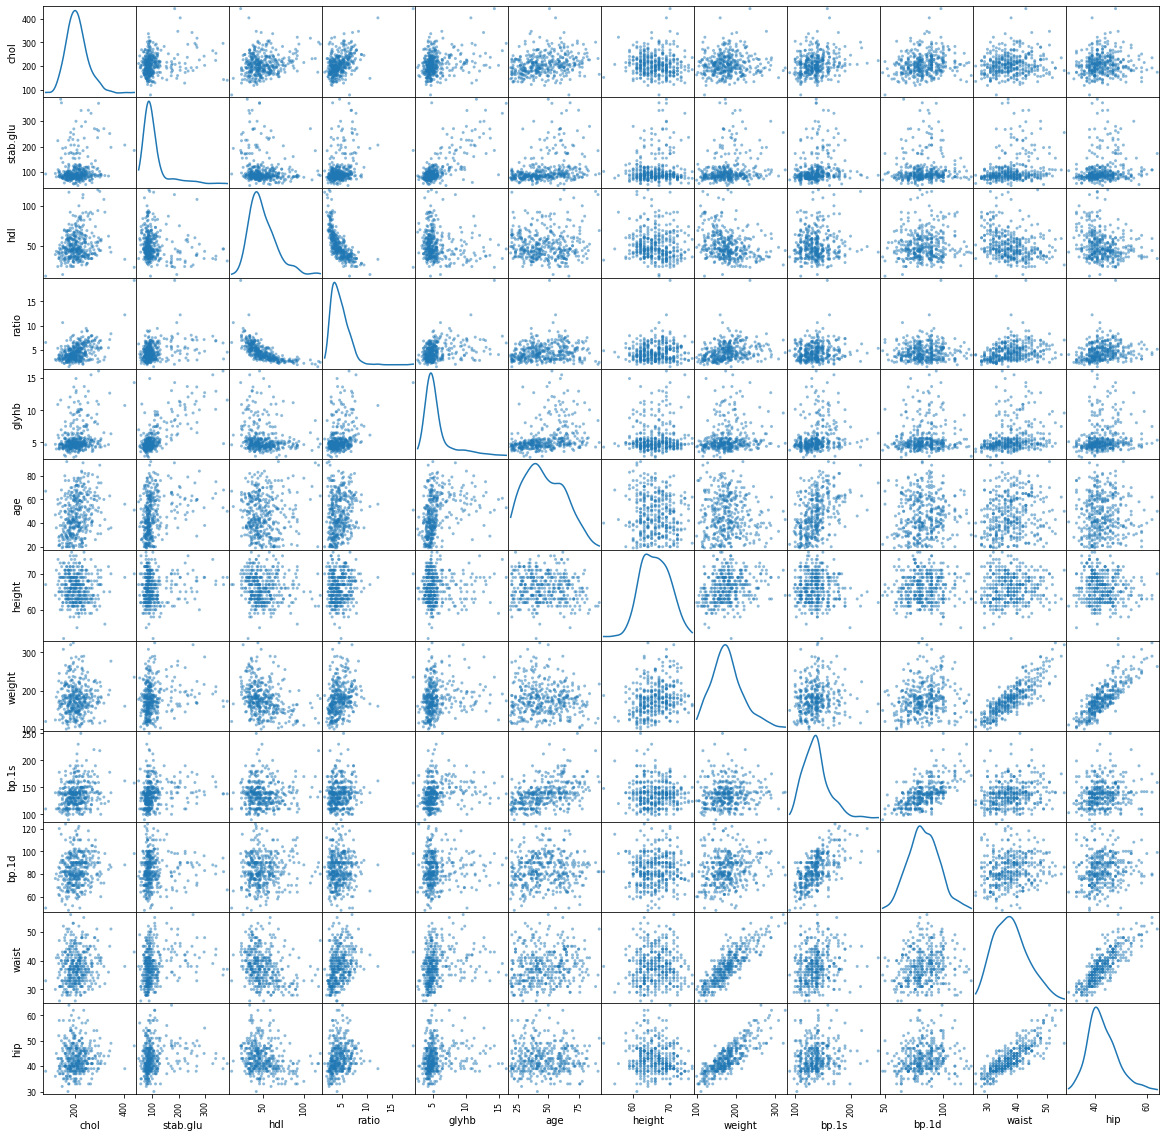

In [7]:
scatter_matrix(df_num, # Make a scatter matrix of all columns
               figsize=(20, 20), # Set plot size
               diagonal='kde')  # Show distribution estimates on diagonal

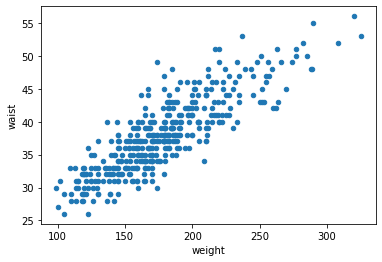

In [8]:
df.plot.scatter(x='weight',y='waist')

In [9]:
df[['weight','waist']].corr()

,weight,waist
weight,1.000000,0.849855
waist,0.849855,1.000000


In [9]:
df[['weight','waist','hip']].corr()

,weight,waist,hip
weight,1.000000,0.849855,0.829115
waist,0.849855,1.000000,0.837080
hip,0.829115,0.837080,1.000000


** What to do with highly correlated variables **

If you find highly correlated variables, there are a few things you can do including:
* Leave them be
* Remove one or more variables
* Combine them in some way

Reducing the number of variables under consideration, either by removing some or by combining them some way is known as **"dimensionality reduction."** How you choose to handle correlated variables is ultimately a subjective decision that should be informed by your goal.

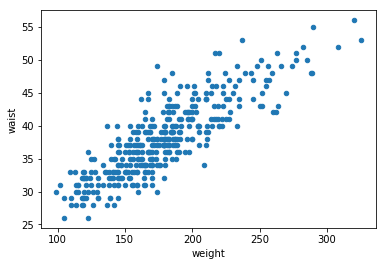

In [8]:
df_num.plot.scatter(x="weight",y="waist")

In [9]:
df_num[["weight","waist"]].corr()

,weight,waist
weight,1.000000,0.851316
waist,0.851316,1.000000
